# Rasch Model Analysis (CML Estimation) and Visualization
This notebook performs Rasch analysis using Conditional Maximum Likelihood Estimation (CMLE) via the `rasch_cmle` module.
It visualizes the results including Item Fit Statistics, Wright Maps, and Measure Distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add current directory to path
sys.path.append(os.getcwd())

import rasch_cmle
import draw_writemap
import draw_pathway

sns.set_theme(style="whitegrid")

In [2]:
# Run the CMLE Rasch Analysis
print("Running Rasch CMLE Analysis...")
items_df, persons_df = rasch_cmle.rasch_cmle('blot.txt')

print("Analysis Complete.")
print(f"Items: {items_df.shape}")
print(f"Persons: {persons_df.shape}")

Running Rasch CMLE Analysis...
Loading Data from blot.txt...
Data Loaded. Shape: (150, 35)
Calibration Sample: 147 persons (excluding extreme scores)
Estimating Item Parameters (CMLE)...

Estimating Person Measures...
Computing Fit Statistics...

Calibration Results (First 5 items):
    ItemIndex         ItemName  Difficulty        SE  InfitMNSQ  OutfitMNSQ  \
20         21    21_Correl+neg    2.218730  0.196031   1.227125    1.569032   
27         28      28_Non-impl    1.577617  0.189518   1.099473    1.187060   
31         32  32_NegRecipImpl    1.106666  0.190663   0.951245    0.829677   
29         30         30_Equiv    1.000075  0.191667   1.180412    1.117345   
12         13     13_RecipExcl    0.898711  0.192891   1.163307    1.304128   

     Infit_t  Outfit_t  PtMeasureCorr  
20  2.353262  3.201172       0.319381  
27  1.242464  1.349244       0.428319  
31 -0.610302 -1.149607       0.532364  
29  2.191344  0.769840       0.383161  
12  1.965401  1.738400       0.368774  
A

In [3]:
# Display Item Statistics
print("Item Statistics (Top 10 sorted by Difficulty):")
# Show specific columns
cols = ['ItemIndex', 'ItemName', 'Difficulty', 'SE', 'InfitMNSQ', 'OutfitMNSQ', 'Infit_t', 'PtMeasureCorr']
display(items_df[cols].head(10))

print("\nPerson Measures (Top 5):")
display(persons_df.head())

Item Statistics (Top 10 sorted by Difficulty):


,ItemIndex,ItemName,Difficulty,SE,InfitMNSQ,OutfitMNSQ,Infit_t,PtMeasureCorr
20,21,21_Correl+neg,2.218730,0.196031,1.227125,1.569032,2.353262,0.319381
27,28,28_Non-impl,1.577617,0.189518,1.099473,1.187060,1.242464,0.428319
31,32,32_NegRecipImpl,1.106666,0.190663,0.951245,0.829677,-0.610302,0.532364
29,30,30_Equiv,1.000075,0.191667,1.180412,1.117345,2.191344,0.383161
12,13,13_RecipExcl,0.898711,0.192891,1.163307,1.304128,1.965401,0.368774
14,15,15_RecipImpl,0.869436,0.193294,0.974809,0.838751,-0.288887,0.523332
7,8,8_Correlat,0.783561,0.194606,0.912654,0.993393,-1.070597,0.526536
25,26,26_ComplAff,0.679736,0.196458,0.906760,0.745453,-1.114778,0.555075
2,3,3_Implicat,0.639244,0.197261,0.988845,0.896163,-0.102887,0.493240
24,25,25_ComplNeg,0.513481,0.200050,1.055273,1.195982,0.640441,0.397758



Person Measures (Top 5):


,PersonID,RawScore,Measure
0,001,29,1.792786
1,002,34,3.878114
2,003,29,1.792786
3,004,34,3.878114
4,005,33,3.124229


Generating Wright Map...


C:\Users\yongd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:383: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(n - .5, -.5, auto=None)


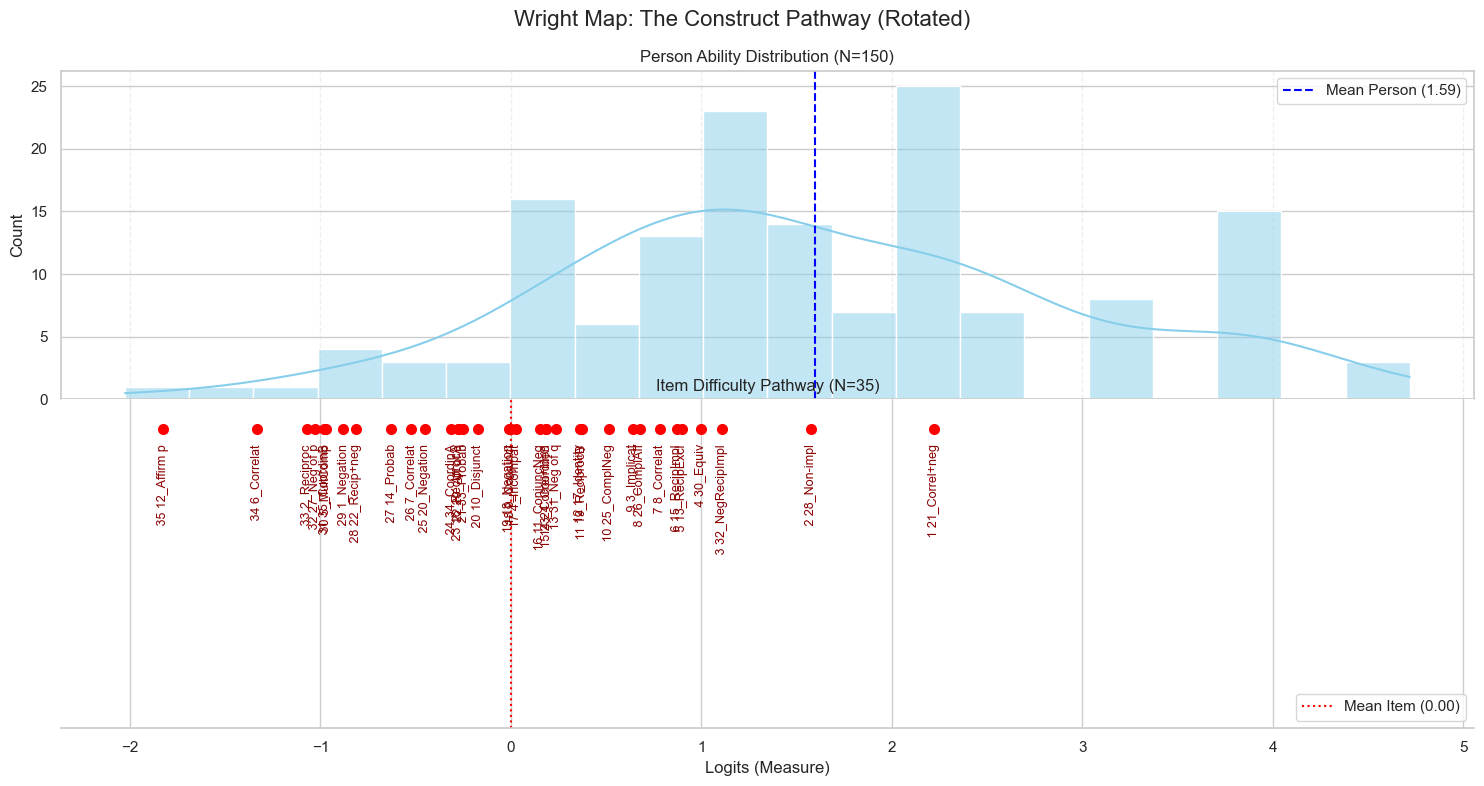

In [4]:
# 1. Wright Map (Variable Map)
# Visualize the distribution of Person Ability vs Item Difficulty
print("Generating Wright Map...")
if persons_df is not None and items_df is not None:
    draw_writemap.draw_wright_map(
        persons_df['Measure'].values, 
        items_df['Difficulty'].values, 
        items_df['ItemName'].values
    )
else:
    print("Error: No data available for plotting.")

Generating Fit Pathway Plot (Items Only)...


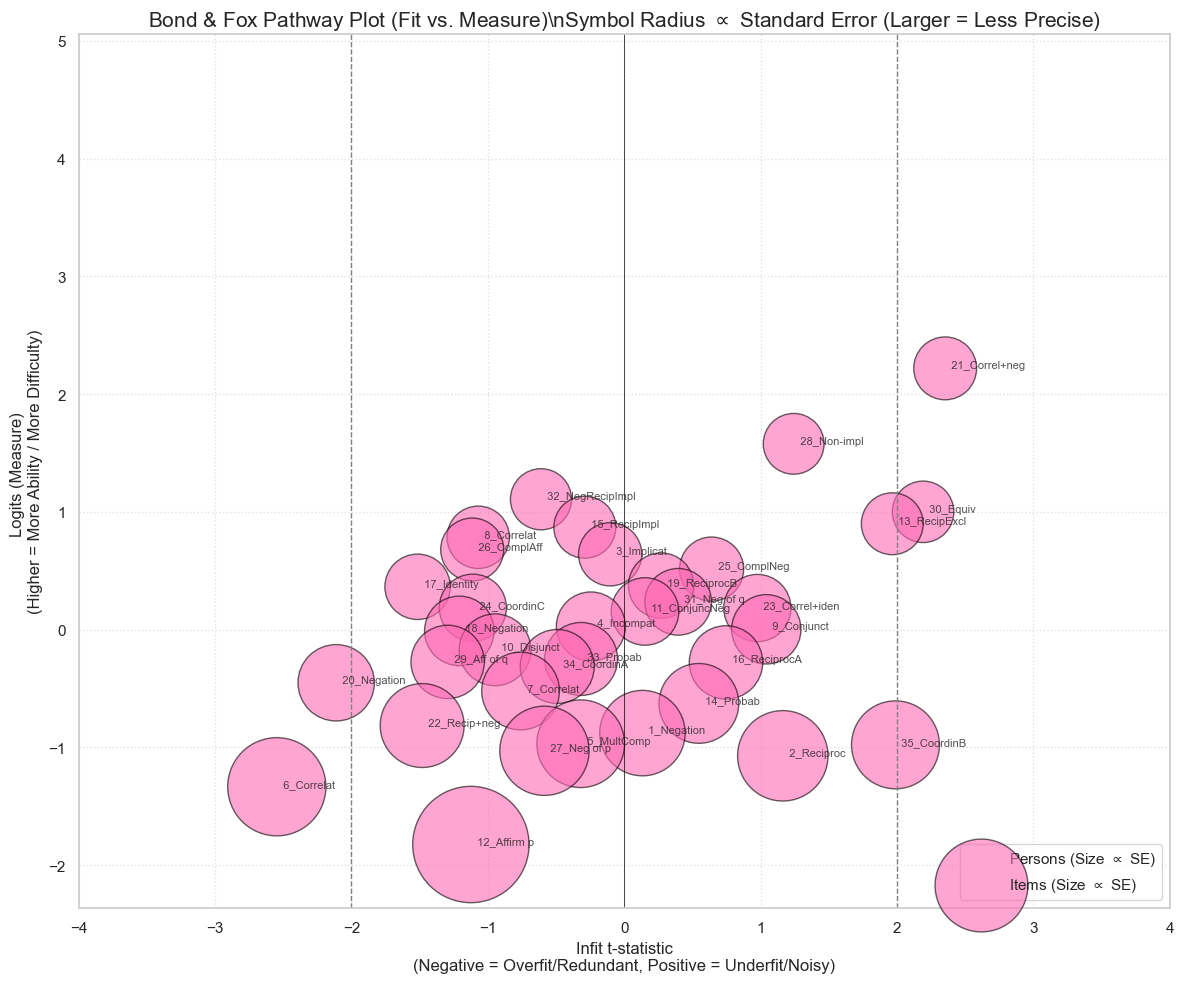

In [5]:
# 2. Bond & Fox Pathway Plot (Fit vs Measure)
# Plots items on a map of Measure (Y) vs Infit t-statistic (X)
print("Generating Fit Pathway Plot (Items Only)...")

if items_df is not None:
    # Note: We don't have person fit stats from this specific CMLE implementation yet, 
    # so we pass zeros for persons to suppress them or plot simplified versions.
    # The draw_pathway function handles both.
    
    draw_pathway.draw_pathway(
        person_locations=persons_df['Measure'].values,
        person_fits=np.zeros(len(persons_df)), # Placeholder
        person_se=np.zeros(len(persons_df)),   # Placeholder
        item_locations=items_df['Difficulty'].values,
        item_fits=items_df['Infit_t'].values,
        item_se=items_df['SE'].values,
        item_labels=items_df['ItemName'].values,
        base_size=100
    )

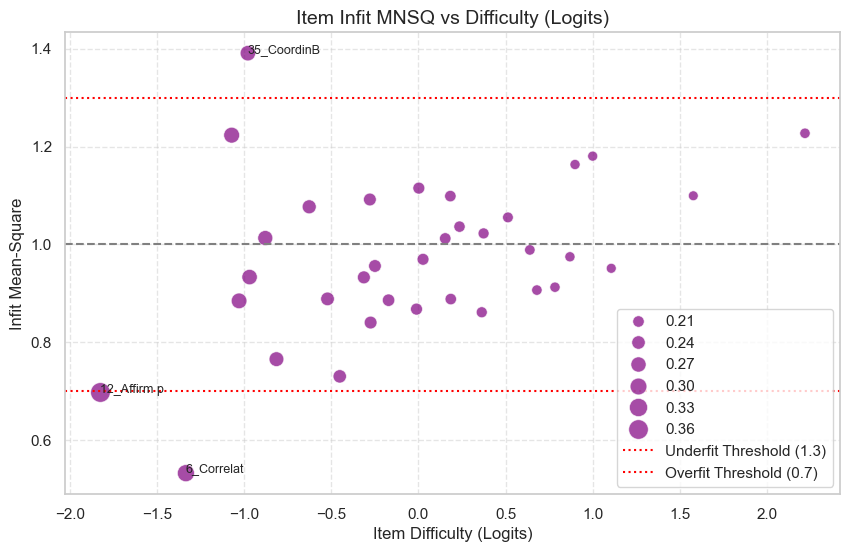

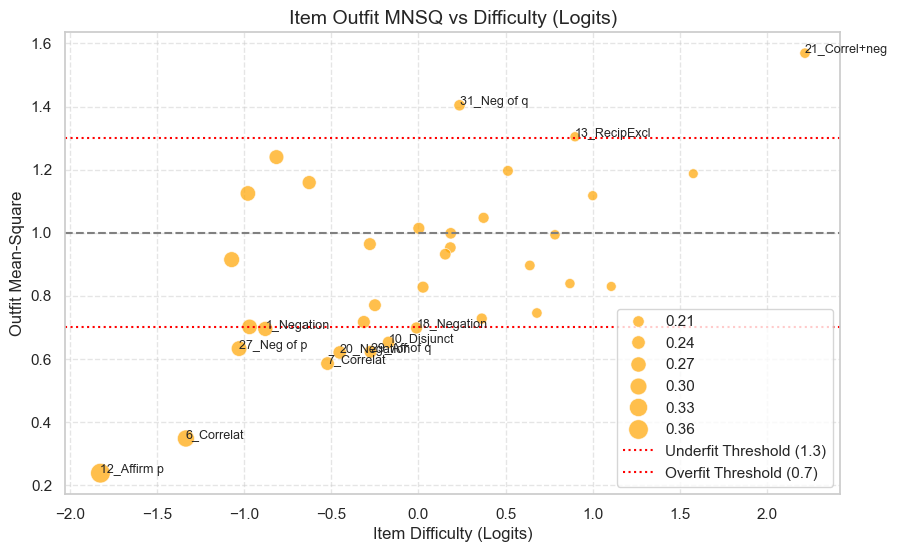

In [6]:
# 3. Item Fit Scatter Plot
# Infit MNSQ vs Difficulty
if items_df is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=items_df, x='Difficulty', y='InfitMNSQ', size='SE', sizes=(50, 200), alpha=0.7, color='purple')
    
    # Guidelines
    plt.axhline(1.0, color='gray', linestyle='--')
    plt.axhline(1.3, color='red', linestyle=':', label='Underfit Threshold (1.3)')
    plt.axhline(0.7, color='red', linestyle=':', label='Overfit Threshold (0.7)')
    
    # Annotate Misfitting Items
    misfit = items_df[(items_df['InfitMNSQ'] > 1.3) | (items_df['InfitMNSQ'] < 0.7)]
    for i, row in misfit.iterrows():
        plt.text(row['Difficulty'], row['InfitMNSQ'], row['ItemName'], fontsize=9)
        
    plt.title("Item Infit MNSQ vs Difficulty (Logits)", fontsize=14)
    plt.xlabel("Item Difficulty (Logits)")
    plt.ylabel("Infit Mean-Square")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Outfit MNSQ vs Difficulty
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=items_df, x='Difficulty', y='OutfitMNSQ', size='SE', sizes=(50, 200), color='orange', alpha=0.7)
    
    # Guidelines
    plt.axhline(1.0, color='gray', linestyle='--')
    plt.axhline(1.3, color='red', linestyle=':', label='Underfit Threshold (1.3)')
    plt.axhline(0.7, color='red', linestyle=':', label='Overfit Threshold (0.7)')
    
    # Annotate Misfitting Items
    misfit_out = items_df[(items_df['OutfitMNSQ'] > 1.3) | (items_df['OutfitMNSQ'] < 0.7)]
    for i, row in misfit_out.iterrows():
        plt.text(row['Difficulty'], row['OutfitMNSQ'], row['ItemName'], fontsize=9)
        
    plt.title("Item Outfit MNSQ vs Difficulty (Logits)", fontsize=14)
    plt.xlabel("Item Difficulty (Logits)")
    plt.ylabel("Outfit Mean-Square")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

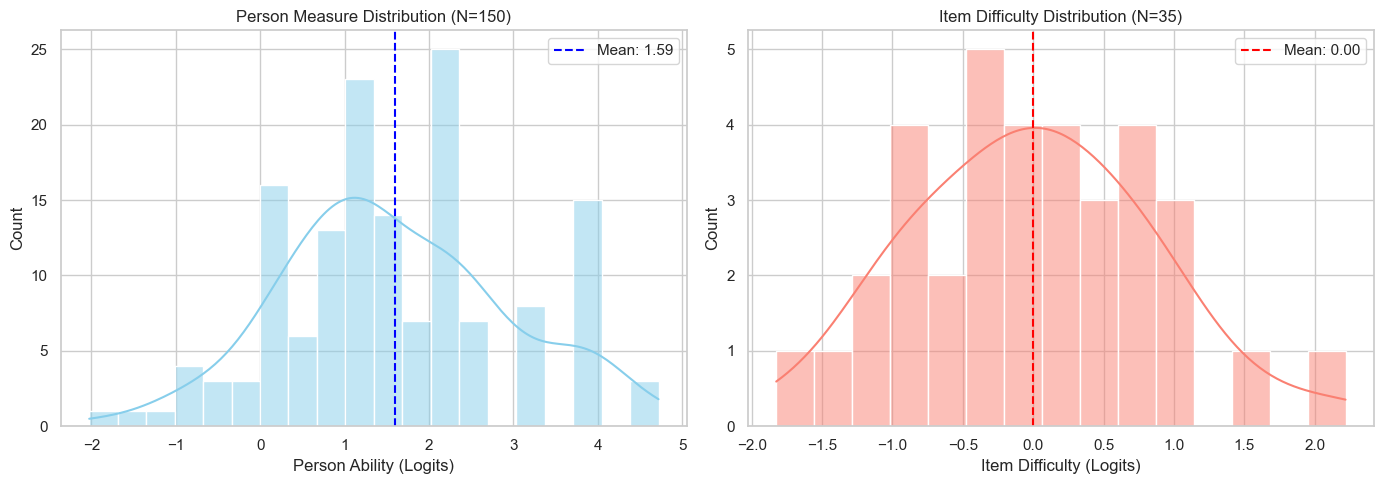

In [7]:
# 4. Distribution of Measures
if persons_df is not None:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(persons_df['Measure'], kde=True, ax=ax[0], color='skyblue', bins=20)
    ax[0].set_title(f'Person Measure Distribution (N={len(persons_df)})')
    ax[0].set_xlabel('Person Ability (Logits)')
    ax[0].axvline(persons_df['Measure'].mean(), color='blue', linestyle='--', label=f"Mean: {persons_df['Measure'].mean():.2f}")
    ax[0].legend()

    sns.histplot(items_df['Difficulty'], kde=True, ax=ax[1], color='salmon', bins=15)
    ax[1].set_title(f'Item Difficulty Distribution (N={len(items_df)})')
    ax[1].set_xlabel('Item Difficulty (Logits)')
    ax[1].axvline(items_df['Difficulty'].mean(), color='red', linestyle='--', label=f"Mean: {items_df['Difficulty'].mean():.2f}")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

The plot includes:

1. Model ICC (Blue Curve): The theoretical S-shaped curve predicting the probability of success based on the estimated item difficulty (
δ≈2.22).
2. Empirical Proportions (Orange Dots): The observed success rates for students grouped by their estimated ability measures. The size of each dot represents the number of students at that ability level.

This allows you to verify how well the Rasch model (theoretical curve) fits the actual student performance data (empirical dots) for this specific item.

Using plot_icc.py module...
Target Item: 21_Correl+neg, Difficulty (Delta) = 2.219


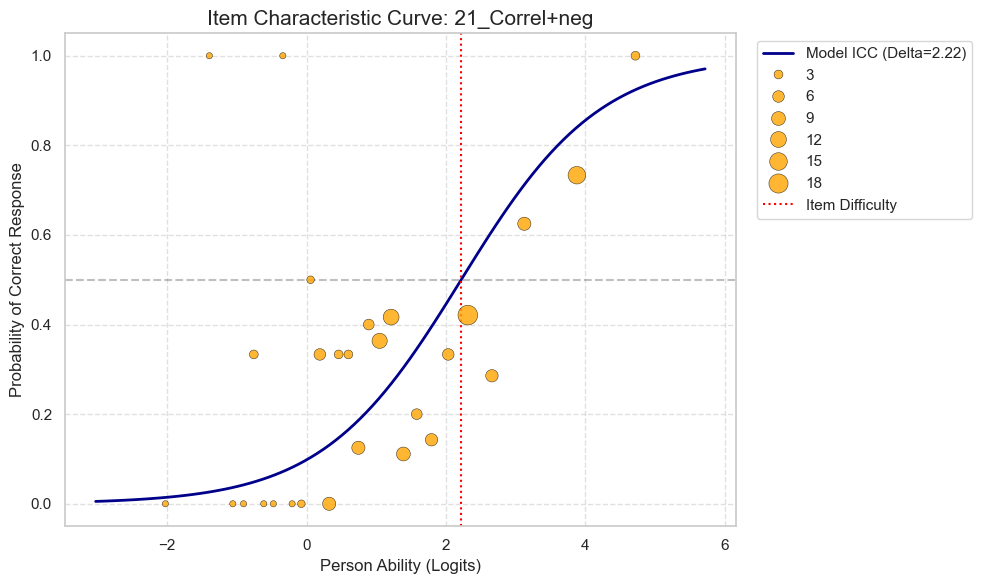

{'item_name': '21_Correl+neg', 'difficulty': 2.2187302647799445, 'empirical_slope': 0.6040225623229473, 'empirical_diff': 2.772124341676125}


In [8]:
# Import ICC Plotting Function
try:
    from readBLOT import read_blot_data
except ImportError:
    pass 

import sys
import os
# Ensure current directory is in path (if not already)
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

import plot_icc
import importlib
importlib.reload(plot_icc) # Reload module to pick up any changes if re-running

# Load Data Once
raw_df = read_blot_data('blot.txt')

print("Using plot_icc.py module...")
# Plot Item 21 (suppress image, show metrics)
res_21 = plot_icc.plot_icc(21, items_df, persons_df, raw_df, color='darkblue', show=True, compute_slope=True)
print({k: v for k, v in res_21.items() if k in ['item_name', 'difficulty', 'empirical_slope', 'empirical_diff']})

### Interpretation of ICC for Item 21 (Correl+neg)

The ICC curve for **Item 21** ($\delta \approx 2.22$) shows signs of **Under-discrimination (Underfit)**, making it a more problematic item than Item 4.

1.  **High Difficulty**:
    *   The curve is shifted far to the right ($\delta = 2.22$), meaning this is a **hard item**. Only students with high ability (> 2.0 logits) should consistently get it correct.

2.  **Shallow Slope (Poor Discrimination)**:
    *   **Visual Mismatch**: The orange empirical points form a "flatter" or "shallower" pattern than the steep blue model curve.
    *   **Unexpected Success (Left)**: In the ability range of 0.0 to 1.5, where the model predicts very low success (< 20%), we see several orange dots significantly *above* the curve (some near 40% success). This suggests low-ability students are "guessing" correctly or using a strategy that doesn't rely on the targeted ability.
    *   **Unexpected Failure (Right)**: In the ability range of 2.0 to 3.0, where the model predicts rising success (> 50-70%), the orange dots are often *below* the curve. High-ability students are missing this item more than they should.

3.  **Diagnosis**:
    *   **Underfit**: This pattern (Highs failing, Lows succeedings) is the definition of **Underfit** (Infit/Outfit MNSQ > 1.3).
    *   **Meaning**: The item is "noisy" or "random." It effectively penalizes high performers and boosts low performers. This often happens with poorly worded questions, ambiguous answer choices, or questions that measure a different construct (multidimensionality).
    *   **Action**: This item should be reviewed for ambiguity. It provides less distinct measurement information than a good Rasch item.

Rasch Model Slope: 1.0 (Fixed)
Empirical data Best-Fit Slope: 0.60 (Flatter!)


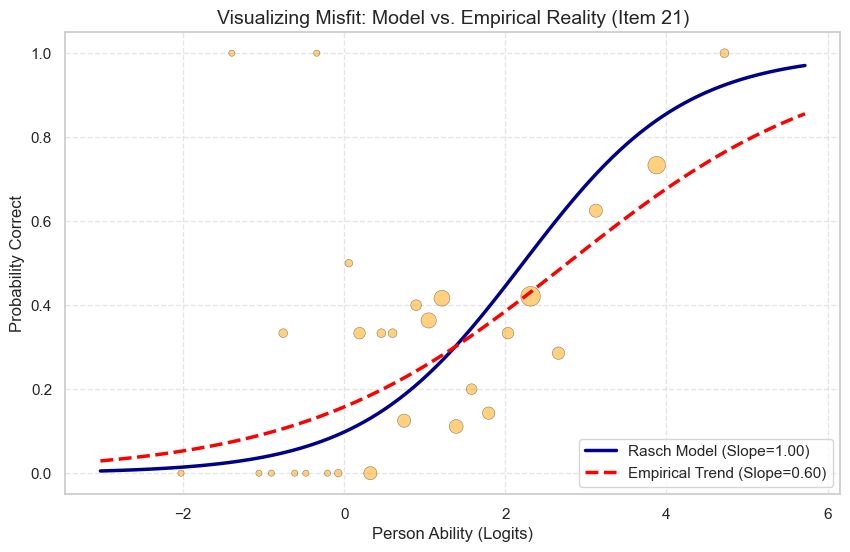

In [9]:
# Visualization of "Flatter" Empirical Slope (Underfit) for Item 21
from scipy.optimize import curve_fit

# 1. Define a 2-Parameter Logistic Function (fitting slope 'a' and diff 'b')
def two_param_logistic(theta, a, b):
    return 1 / (1 + np.exp(-a * (theta - b)))

# 2. Prepare Data for Item 21
target_item_name = [col for col in items_df['ItemName'] if '21' in col][0]
item_21_diff = items_df.loc[items_df['ItemName'] == target_item_name, 'Difficulty'].values[0]

# Get raw data points (Measure vs Response)
x_data = persons_df['Measure']
y_data = raw_df[target_item_name]

# Filter NaNs/Infs
mask = np.isfinite(x_data) & np.isfinite(y_data)
x_clean = x_data[mask]
y_clean = y_data[mask]

# 3. Fit the Empirical Curve (estimating slope 'a' instead of fixing it to 1)
# Initial guess: slope=1, diff=item_diff
popt, pcov = curve_fit(two_param_logistic, x_clean, y_clean, p0=[1, item_21_diff])
emp_slope, emp_diff = popt

print(f"Rasch Model Slope: 1.0 (Fixed)")
print(f"Empirical data Best-Fit Slope: {emp_slope:.2f} (Flatter!)")

# 4. Generate Curves for Plotting
theta_range = np.linspace(x_clean.min() - 1, x_clean.max() + 1, 100)

# Rasch Curve (Slope = 1)
rasch_probs = two_param_logistic(theta_range, 1.0, item_21_diff)

# Empirical Curve (Slope = Estimated)
emp_probs = two_param_logistic(theta_range, emp_slope, emp_diff)

# 5. Plot Comparison
plt.figure(figsize=(10, 6))

# Plot Data Groups (Orange Circles)
plot_df = pd.DataFrame({'Measure': x_clean, 'Response': y_clean})
# Aggregate and rename for clarity
grouped = plot_df.groupby('Measure')['Response'].agg(['mean', 'count']).reset_index()
grouped = grouped.rename(columns={'mean': 'Proportion', 'count': 'N'})
# Avoid seaborn legend label conflict by disabling legend on scatter
sns.scatterplot(data=grouped, x='Measure', y='Proportion', size='N', sizes=(20, 200),
                color='orange', alpha=0.5, edgecolor='black', legend=False)

# Plot Model Curve
plt.plot(theta_range, rasch_probs, color='darkblue', linewidth=2.5, label='Rasch Model (Slope=1.00)')

# Plot Empirical Fit
plt.plot(theta_range, emp_probs, color='red', linestyle='--', linewidth=2.5, label=f'Empirical Trend (Slope={emp_slope:.2f})')

# Annotations
plt.title('Visualizing Misfit: Model vs. Empirical Reality (Item 21)', fontsize=14)
plt.xlabel('Person Ability (Logits)')
plt.ylabel('Probability Correct')
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

Target Item: 4_Incompat, Difficulty (Delta) = 0.026


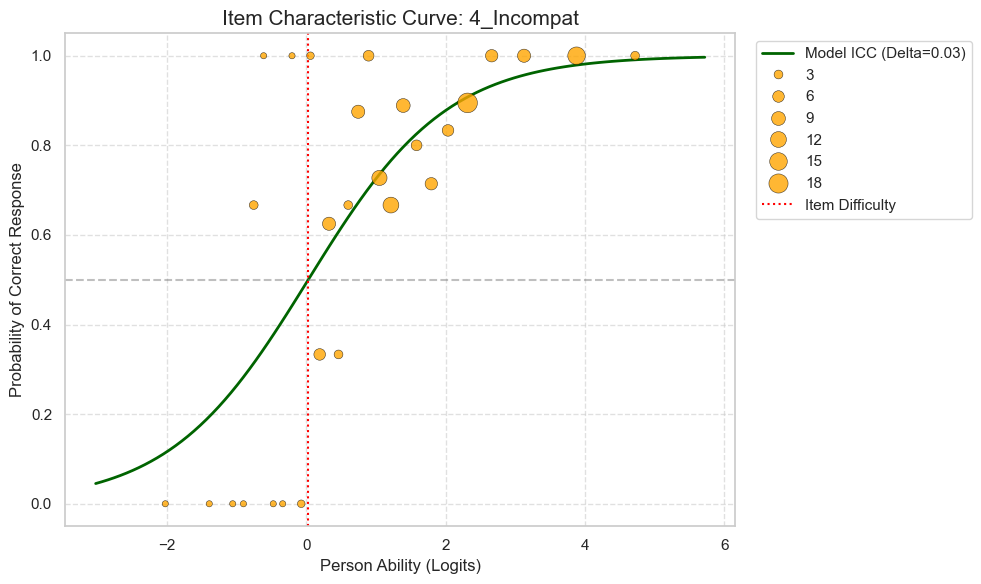

{'item_name': '4_Incompat', 'difficulty': 0.026055549201716266, 'empirical_slope': 0.9881715895158631, 'empirical_diff': -0.040068045559823205}


In [10]:
# Plot Item 4 using the external module (suppress image, show metrics)
res_4 = plot_icc.plot_icc(4, items_df, persons_df, raw_df, 
                          color='darkgreen', show=True, 
                          compute_slope=True)
print({k: v for k, v in res_4.items() if k in ['item_name', 'difficulty', 'empirical_slope', 'empirical_diff']})

### Interpretation of ICC for Item 4 (Incompat)

The ICC curve for **Item 4** ($\delta \approx 0.03$) shows a **reasonably good fit**, but with some noticeable noise in the middle ability range.

1.  **General Adherence to the Model**:
    *   **Trend**: The empirical points (orange circles) generally follow the upward trend of the green model curve. Lower ability students (left) have low success rates, and higher ability students (right) have high success rates, which is what we expect.
    *   **Asymptotes**: The curve correctly approaches 0 on the far left and 1 on the far right.

2.  **Specific Deviations (Noise)**:
    *   **Middle Range Scatter**: In the middle range (Logits 0 to +2), the orange circles bounce *above and below* the line rather than sticking tightly to it.
        *   For example, around Logit +1.0, there is a large circle significantly *below* the curve, while others nearby are *above*.
    *   **Interpretation**: This scatter suggests that while the item generally works as expected, there might be some factor other than pure ability influencing responses for average students. However, because the deviations are somewhat random (above and below) rather than systematic (all on one side), it is often considered **acceptable random measurement error** rather than severe bias.

3.  **Conclusion**:
    *   **Overall Fit**: **Good / Acceptable**. It discriminates (separates low/high performers) effectively.
    *   **Severity**: The fit is likely "productive for measurement," meaning the item is useful effectively measuring student ability despite the minor noise.

Target Item: 10_Disjunct, Difficulty (Delta) = -0.172


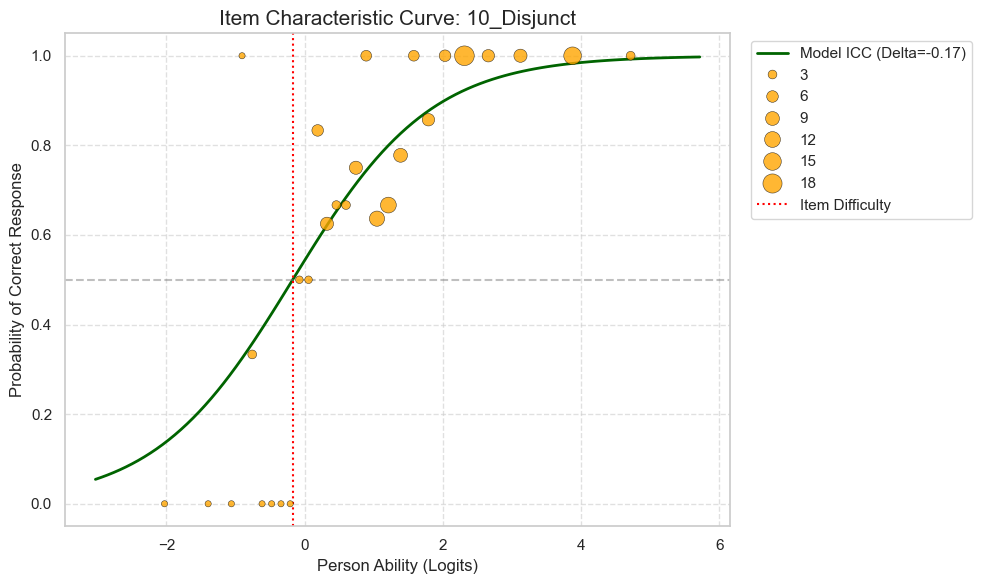

{'item_name': '10_Disjunct',
 'difficulty': -0.17179265402620672,
 'empirical_slope': 1.2055392170792383,
 'empirical_diff': -0.0207972784878718}

In [11]:
plot_icc.plot_icc(10, items_df, persons_df, raw_df, color='darkgreen', compute_slope=True)

### Interpretation of ICC for Item 10 (Disjunct)

Item 10 shows a **good, productive-for-measurement fit**.

- **Discrimination (Slope):** The empirically fitted slope is about **1.21** versus the Rasch slope fixed at 1.0. This indicates **strong discrimination** (the probability of success rises sharply across the middle ability range) without being excessively steep.
- **Centering (Difficulty):** Empirical difficulty is **≈ −0.02**, close to the Rasch item difficulty **≈ −0.17**. This small shift suggests the curve is **well-centered** on the same ability region predicted by Rasch.
- **Empirical Behavior:** The grouped ICC is **monotonic and S-shaped**, with higher-ability groups showing consistently higher success rates. Scatter around the curve is modest and symmetric (above/below) rather than systematic, consistent with normal sampling noise.
- **Overall Conclusion:** The item **discriminates well** and aligns with the model’s location—appropriate to keep in the scale.

Optional checks to confirm:
- Inspect `InfitMNSQ`, `OutfitMNSQ` (typical acceptable range ≈ 0.7–1.3) and `PtMeasureCorr` (> 0.2). If desired, we can add a small code cell to print these for Item 10 from `items_df`. 

In [12]:
# Verify Item 10 difficulty difference relative to SE
row = items_df[items_df['ItemIndex'] == 10].iloc[0]
delta_model = float(row['Difficulty'])
se = float(row['SE'])

res_10 = plot_icc.plot_icc(10, items_df, persons_df, raw_df, show=False, compute_slope=True)
delta_emp = float(res_10['empirical_diff'])

gap = abs(delta_emp - delta_model)
z = gap / se

print(f"Model Δ: {delta_model:.3f}, Empirical Δ: {delta_emp:.3f}")
print(f"Absolute gap: {gap:.3f} logits")
print(f"Gap/SE: {z:.2f} (≈ z-score; <1–1.5 suggests a small difference)")

Target Item: 10_Disjunct, Difficulty (Delta) = -0.172
Model Δ: -0.172, Empirical Δ: -0.021
Absolute gap: 0.151 logits
Gap/SE: 0.67 (≈ z-score; <1–1.5 suggests a small difference)


In [13]:
# Summary: Model Difficulty and Empirical Slope for Items 21, 4, 10
items_to_check = [21, 4, 10]
summary_rows = []

for item_id in items_to_check:
    res = plot_icc.plot_icc(item_id, items_df, persons_df, raw_df,
                            show=False, compute_slope=True)
    summary_rows.append({
        'Item': res.get('item_name', str(item_id)),
        'Model_Difficulty(Δ)': None if res.get('difficulty') is None else round(res['difficulty'], 3),
        'Empirical_Slope': None if res.get('empirical_slope') is None else round(res['empirical_slope'], 3),
        'Empirical_Diff(Δ)': None if res.get('empirical_diff') is None else round(res['empirical_diff'], 3)
    })

summary_df = pd.DataFrame(summary_rows)
print('ICC Summary (Model Difficulty vs Empirical Fit):')
print(summary_df.to_string(index=False))

Target Item: 21_Correl+neg, Difficulty (Delta) = 2.219
Target Item: 4_Incompat, Difficulty (Delta) = 0.026
Target Item: 10_Disjunct, Difficulty (Delta) = -0.172
ICC Summary (Model Difficulty vs Empirical Fit):
         Item  Model_Difficulty(Δ)  Empirical_Slope  Empirical_Diff(Δ)
21_Correl+neg                2.219            0.604              2.772
   4_Incompat                0.026            0.988             -0.040
  10_Disjunct               -0.172            1.206             -0.021


---